In [1]:
import warnings
import numpy as np
import pandas as pd
import sklearn.metrics as metrics
import tensorflow as tf

In [2]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('figure', figsize=(10, 5))

In [3]:
warnings.filterwarnings("ignore")
tf.get_logger().setLevel('ERROR')

In [5]:
from dataset import suny_international
df=suny_international.load_data()['GHI']

## Decomposition
Time series decomposition involves thinking of a series as a combination of level, trend, seasonality, and noise components. 
Decomposition provides a useful abstract model for thinking about time series generally and for better understanding problems during time series analysis and forecasting.
1. <b>Trend</b>: The increasing or decreasing value in the series.
2. <b>Seasonality</b>: The repeating short-term cycle in the series.
3. <b>Noise</b>: The random variation in the series.


The additive model suggests that the components are added together as follows:


`y(t) = Trend + Seasonality + Noise`

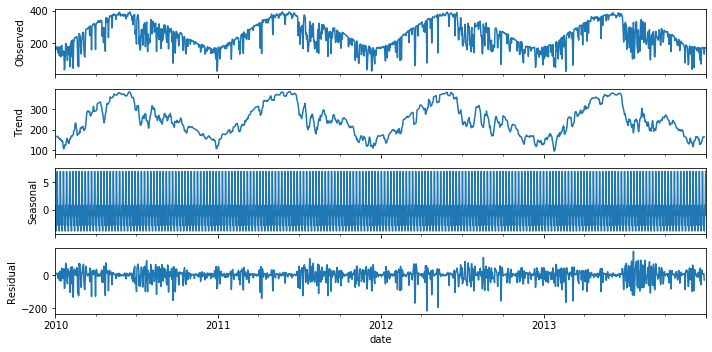

In [58]:
import statsmodels.api as sm
y = df.resample('D').mean()
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

1. <b>Trend</b>: This comes out to be the yearly variation in the data. Notice that the data follows nearly a sinusodial distribution from January being the minima and May being the Maxima  
2. <b>Seasonality</b>: The repeating daily cycle from 6AM to 6PM is captured as the seasonal cycle.
3. <b>Noise</b>: The random noise apart from the above two. The cause can be cloud cover, rain etc.